In [234]:
# External imports
import math
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.naive_bayes import GaussianNB

# Load the dataset
data = pd.read_csv("shuffle_email_spam_classification.csv")

# Visualize the data
data

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1


In [235]:
# Visualize data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [236]:
# Preprocessing

# Check data types 
data.dtypes

Email No.     object
the            int64
to             int64
ect            int64
and            int64
               ...  
military       int64
allowing       int64
ff             int64
dry            int64
Prediction     int64
Length: 3002, dtype: object

In [237]:
# Remove unnecessary column
data.drop(columns=['Email No.',], inplace=True)

# Visualize the updated data
data

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,2,2,2,3,0,0,32,0,0,5,...,0,0,0,0,0,0,0,0,0,0
5168,35,27,11,2,6,5,151,4,3,23,...,0,0,0,0,0,0,0,1,0,0
5169,0,0,1,1,0,0,11,0,0,1,...,0,0,0,0,0,0,0,0,0,1
5170,2,7,1,0,2,1,28,2,0,8,...,0,0,0,0,0,0,0,1,0,1


In [238]:
# Shuffle the data to avoid bias
shuffled_data = data.sample(frac=1).reset_index(drop=True)

# Create helping constants
ROWS = shuffled_data.shape[0]
THRESHOLD = math.floor(0.75*ROWS)

# Visualize values
print(f'There are {ROWS} rows.\n')
print(f'Threshold is: {THRESHOLD}')

There are 5172 rows.

Threshold is: 3879


In [239]:
# Create training data
X = shuffled_data.iloc[0:THRESHOLD:, :-1]
Y = shuffled_data.iloc[0:THRESHOLD:, -1]

# Check dimensions
assert X.shape[0] == Y.shape[0]

# Visualize data for verification
print("X data:\n", X.head(5))
print("Y data:\n", Y.head(5))

X data:
    the  to  ect  and  for  of    a  you  hou  in  ...  enhancements  connevey  \
0    0   3    1    0    0   0   14    0    0   1  ...             0         0   
1    0   2    2    3    0   0   13    0    0   3  ...             0         0   
2    0   1    1    0    0   0    8    2    0   0  ...             0         0   
3   19  29    6   19   11   9  165   15    4  30  ...             0         0   
4    0   3    1    1    1   0    9    2    0   5  ...             0         0   

   jay  valued  lay  infrastructure  military  allowing  ff  dry  
0    0       0    0               0         0         0   0    0  
1    0       0    0               0         0         0   0    0  
2    0       0    0               0         0         0   0    0  
3    0       0    0               0         0         0   2    0  
4    0       0    0               0         0         0   0    0  

[5 rows x 3000 columns]
Y data:
 0    0
1    1
2    0
3    1
4    1
Name: Prediction, dtype: int64


In [240]:
# Create testing data
X_test = shuffled_data.iloc[THRESHOLD:ROWS:, :-1]
Y_test = shuffled_data.iloc[THRESHOLD:ROWS:, -1]

# Check dimensions
assert X_test.shape[0] == Y_test.shape[0]

# Visualize data for verification
print("X Test data:\n", X_test.head(5))
print("Y Test data:\n", Y_test.head(5))

X Test data:
       the  to  ect  and  for  of   a  you  hou  in  ...  enhancements  \
3879   16   8    2    7    4   6  67    4    2  18  ...             0   
3880    4   0    1    2    1   0  13    0    1   0  ...             0   
3881    3   6    1    1    3   2  18    0    1   5  ...             0   
3882    3   1    1    0    1   1  19    0    0   2  ...             0   
3883    0   0    1    0    1   0   5    0    0   0  ...             0   

      connevey  jay  valued  lay  infrastructure  military  allowing  ff  dry  
3879         0    0       0    0               0         0         0   2    0  
3880         0    0       0    0               0         0         0   0    0  
3881         0    0       0    0               0         0         0   1    0  
3882         0    0       0    0               0         0         0   0    0  
3883         0    0       0    0               0         0         0   0    0  

[5 rows x 3000 columns]
Y Test data:
 3879    1
3880    0
3881    

In [241]:
# Classification algorithms

# 1) Logistic Regression
lr = LogisticRegression(solver='lbfgs', max_iter=1000) # Increased max_iter due to ConvergenceWarning

# Fit the model with the training data
lr.fit(X, Y)

# Predict based on the testing data
lr_predictions = lr.predict(X_test)

# 2) Naive Bayes
nb = GaussianNB()

# Fit the model with the training data
nb.fit(X, Y)

# Predict based on the testing data
nb_predictions = nb.predict(X_test)

In [242]:
# Create common function for results visualization
def show_stats(predictions, actual=Y_test):
    """Helper function to visualize model stats"""
    # Stats Summary
    stats = classification_report(actual, predictions, output_dict=False)

    # Visualize all the stats
    print(stats)

    # Accuracy
    accuracy = classification_report(actual, predictions, output_dict=True)['accuracy']

    # Visualize  Accuracy in percentage (%)
    print(f"> Accuracy: {math.ceil(accuracy*100)} %")

In [243]:
# Check the model results
print("[Logistic Regression]\n\nPredictions Vs. Actual:\n")

lr_table = pd.DataFrame({'Predictions': lr_predictions, 'Actual': Y_test})

print(lr_table)

print("[Naive Bayes]\n\nPredictions Vs. Actual:\n")

nb_table = pd.DataFrame({'Predictions': nb_predictions, 'Actual': Y_test})

print(nb_table)

[Logistic Regression]

Predictions Vs. Actual:

      Predictions  Actual
3879            1       1
3880            0       0
3881            0       1
3882            0       0
3883            0       0
...           ...     ...
5167            0       0
5168            0       0
5169            0       0
5170            0       1
5171            1       1

[1293 rows x 2 columns]
[Naive Bayes]

Predictions Vs. Actual:

      Predictions  Actual
3879            1       1
3880            0       0
3881            1       1
3882            0       0
3883            0       0
...           ...     ...
5167            0       0
5168            0       0
5169            0       0
5170            0       1
5171            1       1

[1293 rows x 2 columns]


In [244]:
# Visualize Logistic Regression Stats
show_stats(lr_predictions)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       906
           1       0.97      0.95      0.96       387

    accuracy                           0.98      1293
   macro avg       0.98      0.97      0.97      1293
weighted avg       0.98      0.98      0.98      1293

> Accuracy: 98 %


In [245]:
# Visualize Naive Bayes Stats
show_stats(nb_predictions)

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       906
           1       0.90      0.97      0.94       387

    accuracy                           0.96      1293
   macro avg       0.95      0.96      0.95      1293
weighted avg       0.96      0.96      0.96      1293

> Accuracy: 97 %


In [246]:
# Helper functions to reduce code duplication when working with metrics for both algorithms

def get_counts(table):
    """Helper function to get the counts in the confusion matrix"""
    # Get the indexes
    correct_predictions_ind = (table['Predictions'] == table['Actual'])
    wrong_predictions_ind = (table['Predictions'] != table['Actual'])

    # True Positives
    tp = table.loc[correct_predictions_ind & (table['Predictions'] == 1)]
    # True Negatives
    tn = table.loc[correct_predictions_ind & (table['Predictions'] == 0)]
    # False Positives
    fp = table.loc[wrong_predictions_ind & (table['Predictions'] == 1)]
    # False Negatives
    fn = table.loc[wrong_predictions_ind & (table['Predictions'] == 0)]

    return tp, tn, fp, fn


def get_rows(tp, tn, fp, fn):
    """Helper function to get the number of rows"""
    return tp.shape[0], tn.shape[0], fp.shape[0], fn.shape[0]


def visualize_counts(tp, tn, fp, fn):
    """Helper function to print out the actual counts"""
    # Show counts
    print("TP: {0} \nTN: {1} \n\nFP: {2} \nFN: {3}".format(tp, tn, fp, fn))
    print("\nSum TP+TN: {0}; Sum FP+FN: {1} ".format(tp + tn, fp + fn))
    print("\nSum all (sample size): {} ".format(tp + tn + fp + fn))


def calculate_metrics(tp, tn, fp, fn):
    """Helper function to calculate the metrics"""
    # Accuracy
    acc = (tp + tn) / (tp + tn + fp + fn)
    # True Positive Rate (Sensitivity)
    tpr = tp / (tp + fn)
    # Specificity
    spec = tn / (tn + fp)
    # False Positive Rate
    fpr = fp / (tn + fp)

    return acc, tpr, spec, fpr


def visualize_metrics(acc, tpr, spec, fpr, tp, fp):
    """Helper function to print out the metrics"""
    # Show metrics
    print("Accuracy = {:.2f} % \n".format(acc*100))
    print("Sensitivity (TPR) = {:.4f}".format(tpr))
    print("FPR = {:.4f}".format(fpr))
    print("1-SPEC = {:.4f}".format((1-spec)))
    print("\nPrecision i.e. Positive Predictive Value (PPV) = {:.4f}".format(tp/(tp+fp)))
    print("\nBalanced Accuracy (BA) = {:.4f}".format((tpr+spec)/2))

In [247]:
# Binary classification performance metrics
# NOTE: This is to show understanding of the actual calculations / metrics
# For the K-Fold Cross Validation, I'll use the sklearn library

# Logistic regression
TP_LR, TN_LR, FP_LR, FN_LR = get_rows(*get_counts(lr_table))

# Naive Bayes
TP_NB, TN_NB, FP_NB, FN_NB = get_rows(*get_counts(nb_table))

# Visualize the counts
print("Logistic Regression:\n")
visualize_counts(TP_LR, TN_LR, FP_LR, FN_LR)

print("Naive Bayes:\n")
visualize_counts(TP_NB, TN_NB, FP_NB, FN_NB)

# Verify the number of rows in the training set matches the sum of counts
assert TP_NB + TN_NB + FP_NB + FN_NB == TP_LR + TN_LR + FP_LR + FN_LR == X_test.shape[0]

Logistic Regression:

TP: 366 
TN: 896 

FP: 10 
FN: 21

Sum TP+TN: 1262; Sum FP+FN: 31 

Sum all (sample size): 1293 
Naive Bayes:

TP: 376 
TN: 866 

FP: 40 
FN: 11

Sum TP+TN: 1242; Sum FP+FN: 51 

Sum all (sample size): 1293 


In [248]:
# Calculate and visualize the metrics

# Logistic Regression
ACC_LR, TPR_LR, SPEC_LR, FPR_LR = calculate_metrics(TP_LR, TN_LR, FP_LR, FN_LR)

visualize_metrics(ACC_LR, TPR_LR, SPEC_LR, FPR_LR, TP_LR, FP_LR)

# Naive Bayes
ACC_NB, TPR_NB, SPEC_NB, FPR_NB = calculate_metrics(TP_NB, TN_NB, FP_NB, FN_NB)

visualize_metrics(ACC_NB, TPR_NB, SPEC_NB, FPR_NB, TP_NB, FP_NB)

Accuracy = 97.60 % 

Sensitivity (TPR) = 0.9457
FPR = 0.0110
1-SPEC = 0.0110

Precision i.e. Positive Predictive Value (PPV) = 0.9734

Balanced Accuracy (BA) = 0.9673
Accuracy = 96.06 % 

Sensitivity (TPR) = 0.9716
FPR = 0.0442
1-SPEC = 0.0442

Precision i.e. Positive Predictive Value (PPV) = 0.9038

Balanced Accuracy (BA) = 0.9637


In [249]:
# K-Fold Cross Validation

K_FOLDS = 10


def split_df(k_folds=K_FOLDS):
    # Dictionary for the split dataset
    split_dict = {}
    # Length of each segment
    len_segment = math.floor(ROWS/k_folds)
    # Shuffle the data
    shuffled_data = data.sample(frac=1).reset_index(drop=True)

    for i in range(0, k_folds):
        ind_from = i*len_segment
        ind_to = (i+1)*len_segment - 1

        if i == (k_folds-1):
            ind_to = ROWS - 1

        # Create regions
        training_1 = shuffled_data[0:ind_from]
        test_set = shuffled_data[ind_from:ind_to]
        training_2  = shuffled_data[ind_to:(ROWS-1)]
        
        # Concatenate trainigs into a training set
        training_set = pd.concat([training_1, training_2])

        # Training subset
        X = training_set.iloc[:, :-1]
        Y = training_set.iloc[:, -1]

        # Testing subset
        X_test = test_set.iloc[:, :-1]
        Y_test = test_set.iloc[::, -1]

        # Create a Data object 
        data_obj = {'X': X, 'Y': Y, 'X_test': X_test, 'Y_test': Y_test}

        # Check dimensions
        assert X.shape[0] == Y.shape[0]
        assert X_test.shape[0] == Y_test.shape[0]

        # Save data in the dictionary
        split_dict[i] = data_obj

    return split_dict

# Singleton for the split dataframe
data_k_folds = split_df()

In [250]:
# NOTE: As mentioned in previous section, I'll use the sklearn library for this portion of the project

def evaluate_classifier(classifier, X_training, Y_training, X_test, Y_test):
    """Helper function for the K-Fold CV in order to train a model and get relevant data"""
    # Fit the model with the training data
    classifier.fit(X_training, Y_training)

    # Predict based on the testing data
    predicted = classifier.predict(X_test)
    
    # Evaluate by using predict_proba for the estimated probabilities
    probabilities = classifier.predict_proba(X_test)
    probabilities = probabilities[:, 1] 
    
    fpr, tpr, thresholds = roc_curve(Y_test, probabilities)
    auc = roc_auc_score(Y_test, probabilities)

    # Get the Confusion Matrix
    conf_matrix = confusion_matrix(Y_test, predicted) 

    # Get the Accuracy
    acc = classification_report(Y_test, predicted, output_dict=True)['accuracy']
    cl_report = classification_report(Y_test, predicted, output_dict=False)

    return {"ACC": acc, "AUC": auc, "TPR": tpr, "FPR": fpr, "thresholds":thresholds, 
           "ConfusionMatrix":conf_matrix, "ClassificationReport":cl_report}

<Figure size 640x480 with 0 Axes>

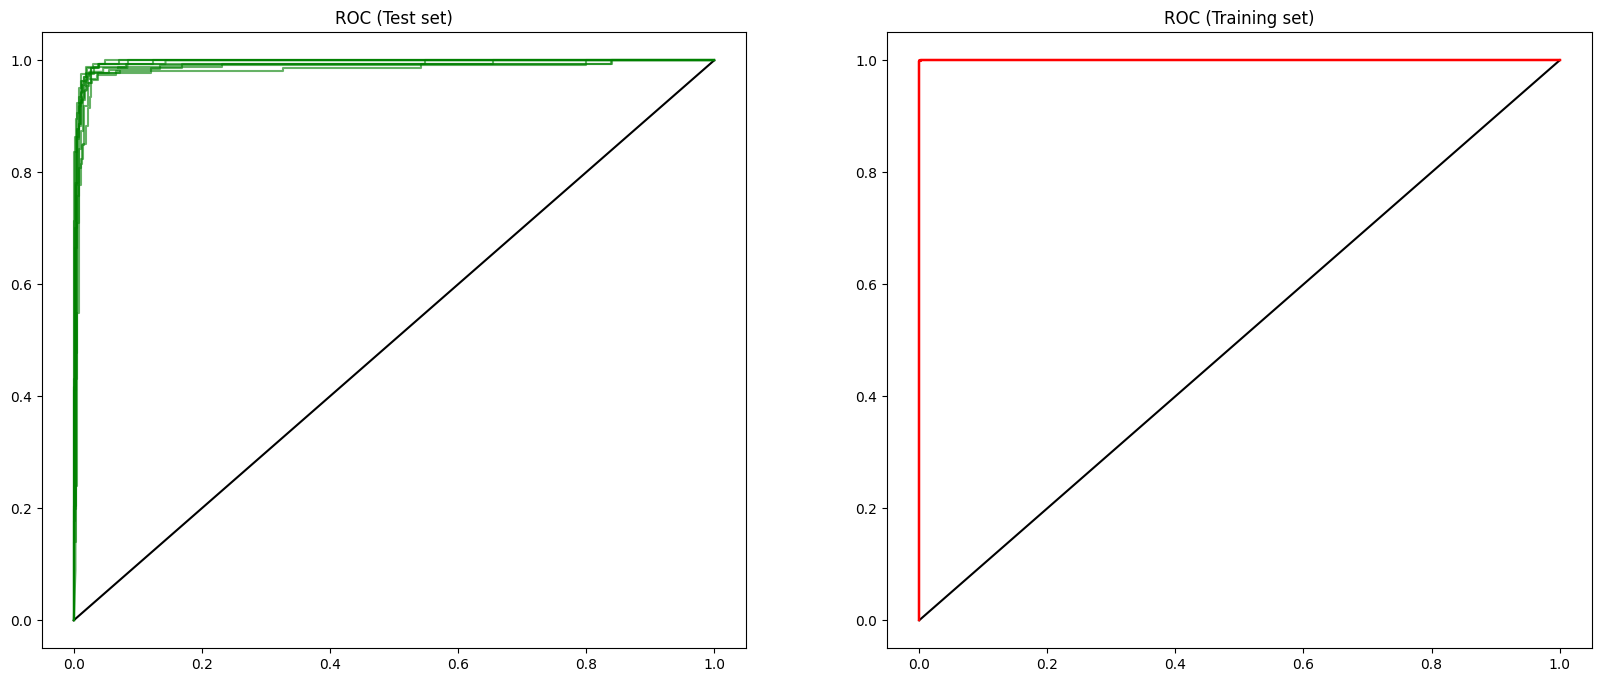

<Figure size 640x480 with 0 Axes>

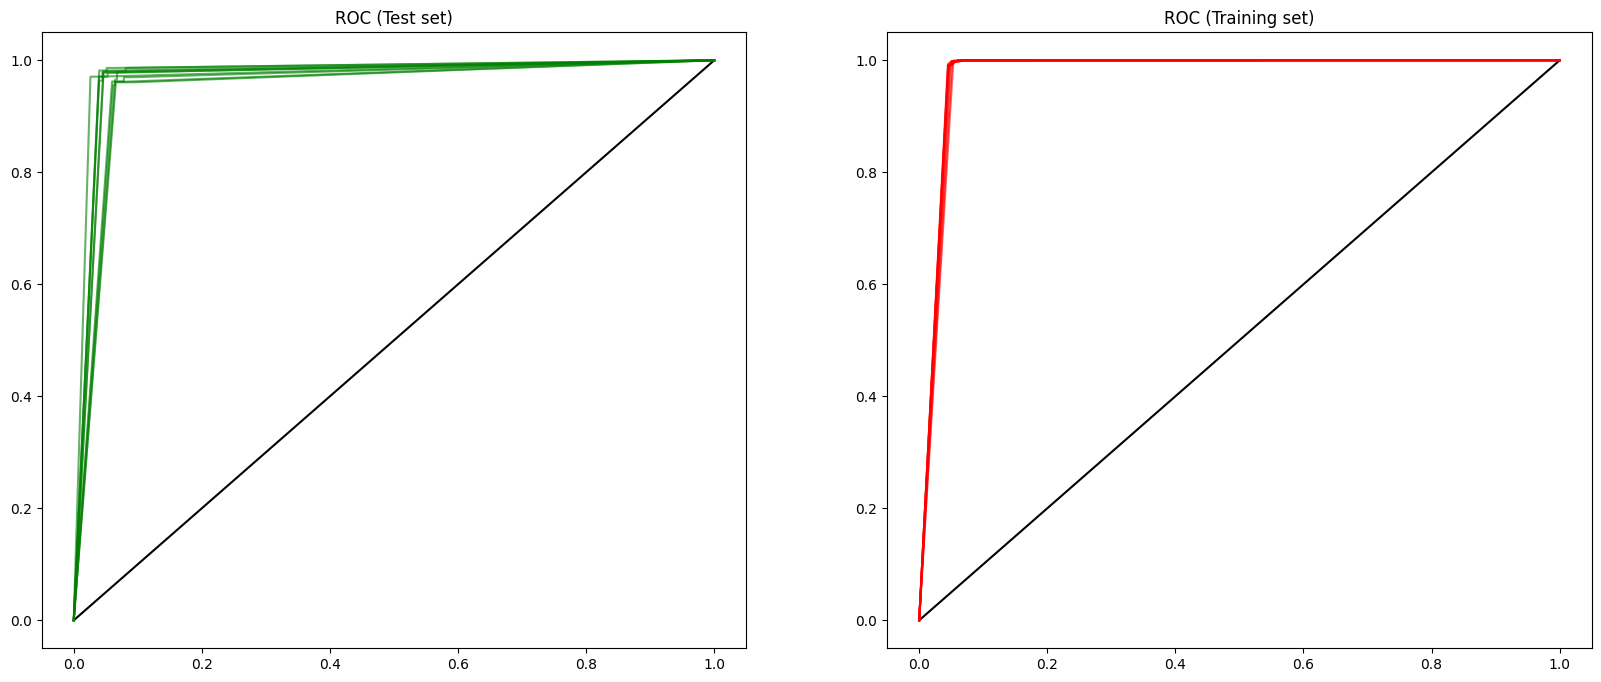

In [256]:
# Helper dictionary to create the classifiers
classifiers_dict = {0: lambda: LogisticRegression(solver='lbfgs', max_iter=1000), 1: lambda: GaussianNB()}

for classifier_idx in range(2):
    # Helper list to hold all the DataFrames
    all_performance_stats = []

    # Plot preparation
    fig = plt.figure()
    fg, axes = plt.subplots(1, 2, figsize=(20, 8))

    # Set the axes
    axes[0].set_xlim([-0.05, 1.05])
    axes[0].set_ylim([-0.05, 1.05])
    axes[0].plot([0, 1], [0, 1], linestyle = "-", color = 'k')
    axes[0].title.set_text("ROC (Test set)")

    axes[1].set_xlim([-0.05, 1.05])
    axes[1].set_ylim([-0.05, 1.05])
    axes[1].plot([0, 1], [0, 1], linestyle = "-", color = 'k')
    axes[1].title.set_text("ROC (Training set)")

    # Prepare the performance stats dataframe
    performance_stats_df = pd.DataFrame(
        columns=[
            "Fold", 
            "ACC Test", 
            "ACC Training",
            "ACC ratio",
            "AUC Test",
            "AUC Training",
            "AUC ratio", 
            "CONF_MTX"
        ]
    )
    for (i, data) in data_k_folds.items():
        # Always create a new instance
        clf = classifiers_dict[classifier_idx]()

        results_tr_tr = evaluate_classifier(
            clf, 
            data['X'],
            data['Y'],
            data['X'],
            data['Y']
        )

        results_tr_test = evaluate_classifier(
            clf, 
            data['X'],
            data['Y'],
            data['X_test'],
            data['Y_test']
        )
        
        axes[0].plot(results_tr_test["FPR"], results_tr_test["TPR"], marker = "", color="green", alpha=0.6)
        axes[1].plot(results_tr_tr["FPR"], results_tr_tr["TPR"], marker = "", color="red", alpha=0.6)
        
        temp = pd.DataFrame(
            {
                'Fold': [i],
                'ACC Test': [results_tr_test["ACC"]*100],
                'ACC Training': [results_tr_tr["ACC"]*100],
                'ACC ratio': [results_tr_test["ACC"]/results_tr_tr["ACC"]],
                'AUC Test': [results_tr_test["AUC"]],
                'AUC Training': [results_tr_tr["AUC"]],
                'AUC ratio': [results_tr_test["AUC"]/results_tr_tr["AUC"]],
                'CONF_MTX': [str(results_tr_test["ConfusionMatrix"])]
            },
            index=[i]
        )

        # Append the result DataFrame to the list
        all_performance_stats.append(temp)

    # Concatenate all the performance stats
    performance_stats_df = pd.concat(all_performance_stats, ignore_index=True)

    # Visualize the plot
    plt.show()